# Aproximación de funciones con series de Taylor.

**Objetivos.**
- Entender cómo un polinomio de Taylor puede aproximar una función.
- Desarrollar diferentes grados del polinomio de Taylor para la función coseno.
- Comparar las diferentes aproximaciones usando el error absoluto en un punto.
- Describir el Teorema de Taylor.
  
<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Series_de_Taylor">MACTI-Series_de_Taylor</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

## Introducción

Algunas veces es necesario aproximar funciones complicadas usando una combinación de otras funciones más simples. Estas funciones más simples deberían permitir un tratamiento sencillo, por ejemplo encontrar sus derivadas o sus integrales. La pregunta es **¿qué tan bien se pueden aproximar las funciones complicadas con una combinación de funciones simples?** <br> <br>

## Un ejemplo de aproximación con Series de Taylor

Consideremos la función trigonométrica $\cos(x)$ en el intervalo $[-2\pi, 2\pi]$ cuya gráfica es la siguiente:

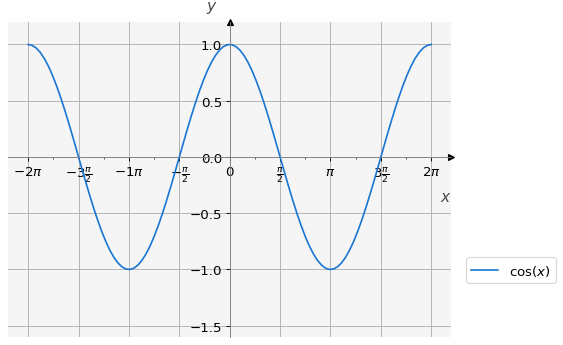

In [23]:
x = np.linspace(-2*np.pi,2*np.pi,100) # Dominio de la función
y = np.cos(x)                         # Función coseno

v = mvis.Plotter(1,1)
v.set_coordsys()
v.plot(1, x, y, label = 'cos($x$)') # Gráfica de la función coseno
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)
        
# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(loc='lower right', bbox_to_anchor=(0.75, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

¿Será posible aproximar la función $\cos(x)$ mediante un polinomio del tipo: 

$$P(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 + \dots$$

Para fijar ideas, intentemos aproximar el $\cos(x)$ en $x=0$. Sabemos que $\cos(0) = 1$. <br>

### Aproximación 0

Esta primera aproximación utiliza solo el término constante del polinomio, esto es: $P_0(x) = c_0$. 

Dado que se debe cumplir que $P_0(0) = \cos(0) = 1$ entonces $c_0 = 1$, es decir: $P_0(x) = 1$ <br>

¿Cómo se ve esta aproximación?

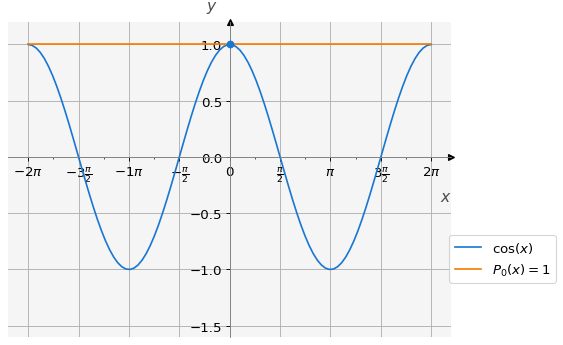

In [28]:
P0 = lambda x : np.ones(len(x)) # Función que generar una lista de 1's.

# Lugar donde se desea aproximar
x0 = 0
y0 = np.cos(x0)

v = mvis.Plotter(1,1)
v.set_coordsys()
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

# Graficamos el coseno y la aproximación P0
v.plot(1, x, y, label = 'cos($x$)')
v.plot(1, x, P0(x), label='$P_0(x) = 1$')
# Dibujamos el punto donde se hace la aproximación x0
v.scatter(1, x0, y0, marker='o', zorder=10)

# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(loc='lower right', bbox_to_anchor=(0.75, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

Observamos que solo hay un punto donde la función y el polinomio son iguales, en $x=0$ (punto negro). No parece ser una buena aproximación. <br> <br>
¿Cómo se podría tener una mejor aproximación?

### Aproximación 1

La respuesta a la pregunta anterior es **usando más términos en el polinomio**. Usemos ahora el polinomio lineal: 

$$P_1(x) = c_0 + c_1 x$$  

Deseamos que $P_1(0) = \cos(0)$, entonces si evaluamos $P_1$ en $x=0$ obtenemos: 

$$P_1(0) = c_0 + c_1 * 0 =  c_0$$
Pero $P_1(0) = \cos(0) = 1$ entonces $c_0 = 1$, que es el mismo valor que habíamos obtenido en la aproximación anterior.

Sería muy bueno que tanto $P_1(x)$ como $\cos(x)$ también tuvieran la misma derivada en $x=0$, es decir $P_1^\prime(0) = \cos^\prime(0)$. 
- Calculemos la derivada y veamos que se puede obtener de esta condición:

$
\begin{array}{lclcc}
P_1(x) = c_0 + c_1 x& \approx & \cos(x) \\
P_1^\prime(x) = c_1 & \approx & -\sin(x)
\end{array}
$
- Ahora evaluamos en $x=0$:

$
\begin{array}{lclcc}
P_1(0) = c_0 + c_1 * 0 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_1^\prime(0) = c_1 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 
\end{array}
$

Observamos de lo anterior que al evaluar $P_1(x)$ y $P_1^\prime(x)$ en $x=0$ obtenemos $c_0 = 1$ y $c_1 = 0$ respectivamente, por lo que el polinomio que se obtiene es el mismo que antes: $P_1(x) = 1$. Nuestra aproximación no mejoró ¿Por qué?

### Aproximación 2

Dado que la aproximación 1 no mejoró con respecto a la aproximación 0, vamos ahora a incluir en el polinomio un término de segundo grado: 
$$P_2(x) = c_0 + c_1 x + c_2 x^2$$

- Siguiendo la misma estrategia que antes podemos calcular la primera y segunda derivadas:

$
\begin{array}{lclcc}
P_2(x) = c_0 + c_1 x + c_2 x^2 & \approx & \cos(x) \\
P_2^\prime(x) = c_1 + 2 c_2 x  & \approx & -\sin(x) \\
P_2^{\prime\prime}(x) = 2 c_2  & \approx & -\cos(x)
\end{array}
$

- Evaluamos en $x=0$:

$
\begin{array}{lclcc}
P_2(0) = c_0 + c_1 * 0 + c_2 * 0^2 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_2^\prime(0) = c_1 + 2 c_2 * 0 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_2^{\prime\prime}(0) = 2 c_2  & = & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 
\end{array}
$

En este caso las condiciones que se pidieron fueron:
- $P_2(0) = \cos(0)$, 
- $P_2^\prime(0) = \cos^\prime(0) = -\sin(0)$
- $P_2^{\prime\prime}(0) = \cos^{\prime\prime}(0)= -\cos(0)$, 

de tal manera que el polinomio de esta aproximación es: $P_2(x) = 1 - \frac{1}{2} x^2$

¿Es mejor esta aproximación? Veamos:

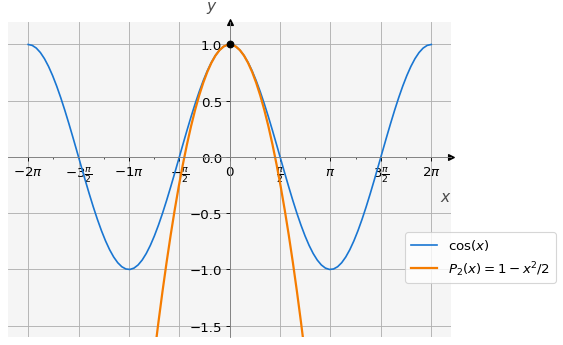

In [31]:
# Construcción del polinomio de aproximación
c0 = 1
c1 = 0
c2 = -1/2
P2 = lambda x : c0 + c1 * x + c2 * x**2 # Evaluación del polinomio

v = mvis.Plotter(1,1)
v.set_coordsys()
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

# Graficamos el coseno y la aproximación P2
v.plot(1, x, y, label = 'cos($x$)')
v.plot(1, x, P2(x), label='$P_2(x) = 1 - x^2/2$', lw = 2)
# Dibujamos el punto donde se hace la aproximación x0
v.scatter(1, x0, y0, marker='o', color='black', zorder=10)

# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(loc='lower right', bbox_to_anchor=(0.75, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

#### Cálculo del error.

Observamos que esta aproximación es muy buena en una vecindad de $x=0$. 
Una manera de evaluar la diferencia entre $P_2(x)$ y $\cos(x)$ en un intervalo alrededor de $x=0$ es calculando la norma del error absoluto entre la aproximación y la función, es decir:

$\displaystyle Error = ||\hat{u} - u||$

donde $\hat{u}$ es la aproximación y $u$ es el valor exacto. Existen varias maneras de calcular la norma de un vector, para ello recomendamos que revises el siguiente cuaderno [04_Normas_Vectoriales.ipynb](../Algebra_Lineal_01/04_Normas_Vectoriales.ipynb) . Calcularemos la norma Euclideana que se define como:

$\displaystyle Error = ||\hat{u}_i - u_i||_2 = \left[\sum_{i=1}^{N} (u_a(i) - u(i))^2 \right]^{1/2}$

donde $N$ es el número de puntos donde se realiza la comparación. Calculemos este error para la aproximación $P_2(x)$ en el intervalo $[-\pi/2, \pi/2]$ con $100$ puntos:

In [32]:
# Definimos el intervalo xa = [-pi/2, pi/2] 
xa = np.linspace(-np.pi*0.5, np.pi*0.5, 100) # usamos N = 100 muestras para la comparación

# Calculamos la norma Euclideana del error para P2
Error_P2 = np.linalg.norm(P2(xa) - np.cos(xa), 2)
print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_P2))

||P2(x) - cos(x)|| =  0.8216656


### Aproximación 3

Veamos si podemos mejorar la aproximación con un polinomio de grado 3: 
$$P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$$
En este caso, para encontrar los coeficientes imponemos las siguientes condiciones:

$
\begin{array}{lclcc}
P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 & \approx & \cos(x) \\
P_3^\prime(x) = c_1 + 2 c_2 x + 3 c_3 x^2 & \approx & -\sin(x) \\
P_3^{\prime\prime}(x) = 2 c_2 + 6 c_3 x & \approx & -\cos(x) \\
P_3^{\prime\prime\prime}(x) = 6 c_3  & \approx & \sin(x) \\
    \hline
P_3(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_3^\prime(0) = c_1 + 2 c_2 * 0 + 3 c_3 * 0^2 & = & -\sin(0) = 0 & \Longrightarrow & c_1 = 0 \\
P_3^{\prime\prime}(0) = 2 c_2 + 6 c_3 * 0 & = & -\cos(0) = -1 & \Longrightarrow & c_2 = -1/2 \\   
P_3^{\prime\prime\prime}(0) = 6 c_3  & = & \sin(0) = 0 & \Longrightarrow & c_3 = 0 \\   
\end{array}
$

es decir, ahora las condiciones son para la función y sus derivadas hasta la de tercer orden. Sustituyendo los coeficientes antes calculados en el polinomio vemos que no hay cambios con respecto a la aproximación anterior: $P_3(x) = 1 - \frac{1}{2} x^2$ ¿Por qué?

Hagamos una aproximación con más términos.

### Aproximación 4

En esta aproximación usaremos un polinomio de grado 4: 
$$P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4$$

Con las siguientes condiciones:

$
\begin{array}{lclcc}
P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 & \approx & \cos(x) \\
P_4^\prime(x) = 1 * c_1 + 2 * c_2 x + 3 * c_3 x^2 + 4 * c_4 x^3 & \approx & -\sin(x) \\
P_4^{\prime\prime}(x) = 1 * 2 * c_2 + 2 * 3 * c_3 x + 3 * 4 * c_4 x^2 & \approx & -\cos(x) \\
P_4^{\prime\prime\prime}(x) = 1 * 2 * 3 * c_3  + 2 * 3 * 4 * c_4 x & \approx & \sin(x) \\
P_4^{(4)}(x) = 1 * 2 * 3 * 4 * c_4 & \approx & \cos(x) \\
    \hline
P_4(0) = c_0 + c_1 * 0 + c_2 * 0^2 + c_3 * 0^3 + c_4 0^4 & = & \cos(0) = 1 & \Longrightarrow & c_0 = 1\\
P_4^\prime(0) = 1! * c_1 + 2 * c_2 *0 + 3 * c_3 * 0^2 + 4 * c_4 * 0^3 & = 
& -\sin(0) = 0 & \Longrightarrow & c_1 = \frac{0}{1!} \\
P_4^{\prime\prime}(0) = 2! * c_2 + 2 * 3 * c_3 * 0 + 3 * 4 * c_4 * 0^2 & = 
& -\cos(0) = -1 & \Longrightarrow & c_2 = \frac{-1}{2!} \\   
P_4^{\prime\prime\prime}(0) = 3! * c_3  + 2 * 3 * 4 * c_4 * 0 & = 
& \sin(0) = 0 & \Longrightarrow & c_3 = \frac{0}{3!} \\
P_4^{(4)}(x) = 4! * c_4 & = 
& \cos(0) = 1 & \Longrightarrow & c_4 = \frac{1}{4!} \\
\end{array}
$

Obsérvese que hemos puesto de manera explícita los coeficientes de multiplicación que se obtienen al momento de calcular las derivadas. 
Lo anterior es para darnos cuenta de que los coeficientes se calculan usando el factorial de un número. 
De esta manera, podemos escribir el polinomio como sigue:

$P_4(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + c_4 x^4 = 1 + \frac{0}{1!} x + \frac{-1}{2!} x^2 + \frac{0}{3!} x^3 + \frac{1}{4!} x^4 = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4$

Una cosa interesante que se puede notar es que los coeficientes de las aproximaciones anteriores se mantienen en el mismo valor, sin importar el grado del polinomio que se use.

Veamos que tan buena es esta última aproximación:

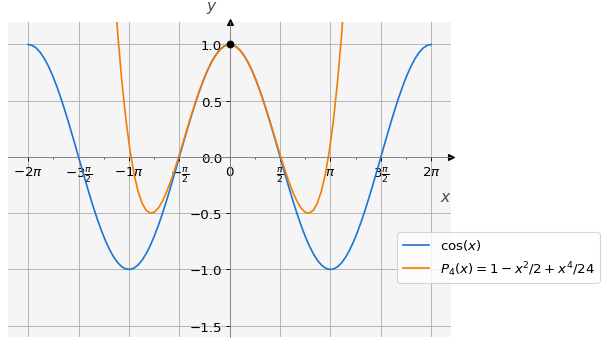

In [34]:
# Construcción del polinomio de aproximación
c3 = 0
c4 = 1/24
P4 = lambda x : c0 + c2 * x**2 + c3 * x**3 + c4 * x**4 # Evaluación del polinomio

v = mvis.Plotter(1,1)
v.set_coordsys()
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

# Graficamos el coseno y la aproximación P4
v.plot(1, x, y, label = 'cos($x$)')
v.plot(1, x, P4(x), label='$P_4(x) = 1 - x^2 / 2 + x^4 / 24$')

# Dibujamos el punto donde se hace la aproximación x0
v.scatter(1, x0, y0, marker='o', color='black', zorder=10)

# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(loc='lower right', bbox_to_anchor=(0.85, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

Observamos una mejor aproximación. Esto lo podemos comprobar calculando los errores para 
$P_2$ y $P_4$:

In [35]:
# Calculamos la norma Euclideana del error para P4
Error_P4 = np.linalg.norm(P4(xa) - np.cos(xa), 2)

print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_P2))
print('||P4(x) - cos(x)|| = {:10.8}'.format(Error_P4))

||P2(x) - cos(x)|| =  0.8216656
||P4(x) - cos(x)|| = 0.059051112


Nótese lo siguiente: 
- El error disminuyó con respecto a la aproximación con $P_2(x)$. 
- Los polinomios de grado impar no aportan mejoría, dado que las derivadas impares corresponden a la función $\sin(x)$ que al evaluarla en $x=0$ nos da un valor de cero, lo cual elimina el término impar del polinomio. 

Entonces, si queremos mejorar la aproximación de $P_4(x)$ deberíamos usar un polinomio de grado 6. El polinomio de grado 6 es:

$P_6(x) = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4 - \frac{1}{6!} x^6$

Se deja como ejercicio al estudiante que verifique que los coeficientes de $P_6$ están correctamente calculados. 

La gráfica de este último polinomio es la siguiente:

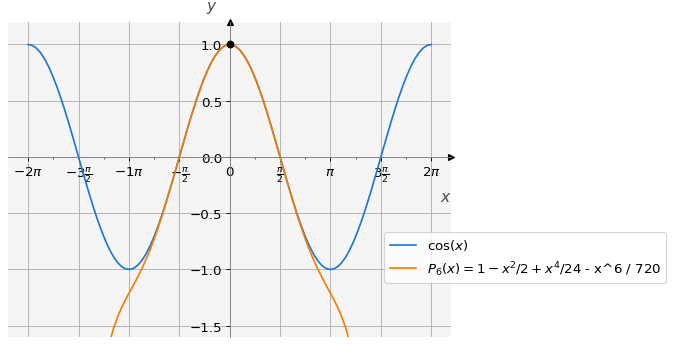

In [36]:
# Construcción del polinomio de aproximación
c5 = 0
c6 = -1 / (1 * 2 * 3 * 4 * 5 * 6)
P6 = lambda x : c0 + c2 * x**2 + c4 * x**4 + c5 * x**5 + c6 * x**6

v = mvis.Plotter(1,1)
v.set_coordsys()
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

# Graficamos el coseno y la aproximación P4
v.plot(1, x, y, label = 'cos($x$)')
v.plot(1, x, P6(x), label='$P_6(x) = 1 - x^2 / 2 + x^4 / 24$ - x^6 / 720')
# Dibujamos el punto donde se hace la aproximación x0
v.scatter(1, x0, y0, marker='o', color='black', zorder=10)

# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(loc='lower right', bbox_to_anchor=(1.0, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

Los errores correspondientes para $P_2$, $P_4$ y $P_6$ son los siguientes:

In [37]:
# Calculamos la norma Euclideana del error para P6
Error_P6 = np.linalg.norm(P6(xa) - np.cos(xa), 2)

print('||P2(x) - cos(x)|| = {:10.8}'.format(Error_P2))
print('||P4(x) - cos(x)|| = {:10.8}'.format(Error_P4))
print('||P6(x) - cos(x)|| = {:10.8}'.format(Error_P6))

||P2(x) - cos(x)|| =  0.8216656
||P4(x) - cos(x)|| = 0.059051112
||P6(x) - cos(x)|| = 0.002351497


Vemos que la aproximación con $P_6(x)$ es la mejor.

Grafiquemos todas las aproximaciones juntas:

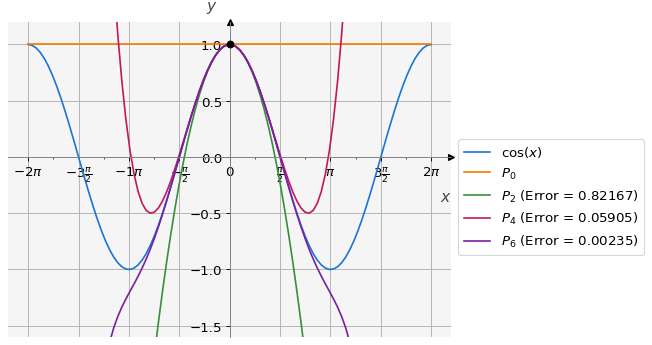

In [40]:
v = mvis.Plotter(1,1)
v.set_coordsys()
ax = v.axes(1)
v.set_ticks(ax, ax.get_xticks(), ax.get_yticks(), PI=True)

# Graficamos el coseno y junto con p0, p2, p4 y p6
v.plot(1, x, y, label = 'cos($x$)')
v.plot(1, x, P0(x), label='$P_0$')
v.plot(1, x, P2(x), label='$P_2$ (Error = {:6.5f})'.format(Error_P2))
v.plot(1, x, P4(x), label='$P_4$ (Error = {:6.5f})'.format(Error_P4))
v.plot(1, x, P6(x), label='$P_6$ (Error = {:6.5f})'.format(Error_P6))
# Dibujamos el punto donde se hace la aproximación x0
v.scatter(1, x0, y0, marker='o', color='black', zorder=10)

# Configuración de la gráfica
plt.ylim(-1.6,1.2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

v.grid()
v.legend(bbox_to_anchor=(0.95, 0.15, 0.5, 0.5), frameon=True, facecolor='w')
v.show()

### Resumen

- Hemos visto como una función puede ser aproximada por una combinación lineal de otras funciones, en este caso por polinomios.
- Los polinomios son más fáciles de tratar, por ejemplo para calcular sus derivadas y sus integrales.
- Para calcular los coeficientes del polinomio de aproximación, la estrategia es que se cumplan las siguientes condiciones:
    + la función y el polinomio deben ser iguales cuando se evalúan en el punto donde se desea hacer la aproximación.
    + las derivadas de la función y las correspondientes derivadas del polinomio, deben ser iguales cuando se evalúan en el punto donde se desea hacer la aproximación.
- Por ejemplo, si se desea aproximar la función $f(x)$ en $x=0$ usando $P_3(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3$ imponemos las condiciones:

$
\begin{array}{ccc}
P_3(0) = f(0) & \text{ para obtener } & c_0 = f(0)\\
P_3^\prime(0) = f^\prime(0) & \text{ para obtener } & c_1 = f^\prime(0) / 1!\\
P_3^{\prime\prime}(0) = f^{\prime\prime}(0) & \text{ para obtener } & c_2 = f^{\prime\prime}(0) / 2!\\
P_3^{\prime\prime\prime}(0) = f^{\prime\prime\prime}(0) & \text{ para obtener } & c_3 = f^{\prime\prime\prime}(0) / 3!\\
\end{array}
$

- Por lo tanto, otra manera de escribir el polinomio es la siguiente:

$P_3(x) = f(0) + \dfrac{f^\prime(0)}{1!} x + \dfrac{f^{\prime\prime}(0)}{2!} x^2 + \dfrac{f^{\prime\prime\prime}(0)}{3!} x^3$ 

- Se puede comprobar fácilmente que si la aproximación se requiere hacer en un punto diferente de cero, digamos en $x = a$, el polinomio de tercer grado se escribe como:

$P_3(x) = f(a) + \dfrac{f^\prime(a)}{1!}(x-a) + \dfrac{f^{\prime\prime}(a)}{2!} (x-a)^2 + \dfrac{f^{\prime\prime\prime}(a)}{3!} (x-a)^3$ 

- La forma anterior se conoce como la serie (o polinomio) de Taylor de tercer grado alrededor de $a$. 

- En general, una **serie de Taylor de grado $n$** se escribe como:

$\displaystyle
P_n(x) = f(a) + f^\prime(a)(x-a) + f^{\prime\prime}(a)\frac{(x-a)^2}{2!} + \dots + f^{(n)}(a)\frac{(x-a)^n}{n!}
 = \sum_{i=0}^n f^{(i)}(a)\frac{(x-a)^i}{i!}$  <br> (recordemos que $0! = 1$)
 
 - Cuando $a = 0$ la serie de Taylor también se conoce como serie de Maclaurin.
 - Es probable que encuetres diferentes notaciones para las series de Taylor, particularmente suele usarse $T_n(x)$ para hacer referencia a una de estas series.
 - **OJO**: Para que todo la anterior sea válido, se deben cumplir ciertas condiciones sobre la la función que se está aproximando, particularmente que todas las derivadas de $f(x)$ hasta la $n$-ésima existan y sean continuas.

## Herramienta interactiva

La siguiente herramienta permite evaluar de manera interactiva diferentes series de Taylor para algunas funciones. Puedes elegir la función, el grado del polinomio de aproximación y el lugar donde se desea aproximar. **OJO**: cuidado con la función $\log(x)$.

In [2]:
%run "./zinteractivo1.ipynb"

interactive(children=(Dropdown(description='función', options=(cos(x), sin(x), tan(x), exp(x), exp(x)*cos(3*x)…

<function __main__.calcTaylor(función, grado, xo=0)>

Ahora que ya sabemos que usando las series de Taylor es posible aproximar funciones hasta un cierto grado, y sabemos además cómo construir estas series para cualquier función continua y diferenciable, podemos hablar de su aplicación en la vida real. Pero antes veamos un resultado teórico que es útil en la práctica.

## Teorema de Taylor

Este teorema nos dice básicamente qué tan grande es la diferencia entre la función $f(x)$ y su aproximación con una serie de Taylor $T_n(x)$ en un punto específico. El teorema se escribe como sigue:
***
Si tenemos una función $f(x)$ que tiene al menos $(n+1)$ derivadas continuas en un intervalo que contiene a $a$ y $x$, entonces:

$\displaystyle
f(x) = f(a) + f^\prime(a)(x-a) + f^{\prime\prime}(a)\frac{(x-a)^2}{2!} + \dots + f^{(n)}(a)\frac{(x-a)^n}{n!} + R_n(x)
 = T_n(x) + R_n(x)
$

donde $T_n(x)$ es el polinomio de Taylor de grado $n$ de $f(x)$ y $R_n(x)$ se conoce como el error o el residuo.
***

### Forma del residuo $R_n(x)$:

Existen varias formas para expresar el residuo:

- Forma de Lagrange:
$\displaystyle
\boxed{R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{n+1}}
$
- Forma de Cauchy:
$\displaystyle
\boxed{R_n(x) = \frac{f^{(n+1)}(\xi)}{n!}(x-\xi)^{n}(x-a)}
$
- Forma Integral:
$\displaystyle
\boxed{R_n(x) = \int_{a}^{x} \frac{f^{(n+1)}(t)}{n!} (x-t)^n dt}
$

donde $\xi$ es un número real entre $x$ y $a$.

Estas tres formas NO permiten calcular de manera sencilla el residuo por lo que en general se usa una cota, como se muestra a continuación:

Si $|f^{(n+1)}(x)| \leq M$ en el intervalo $(a-x, a+x)$ entonces el residuo es

$\displaystyle
\boxed{R_n(x) \leq \frac{M(x-a)^{n+1}}{(n+1)!}}
$

Usando esta desligualdad, se pueden hacer distintos tipos de aproximaciones.